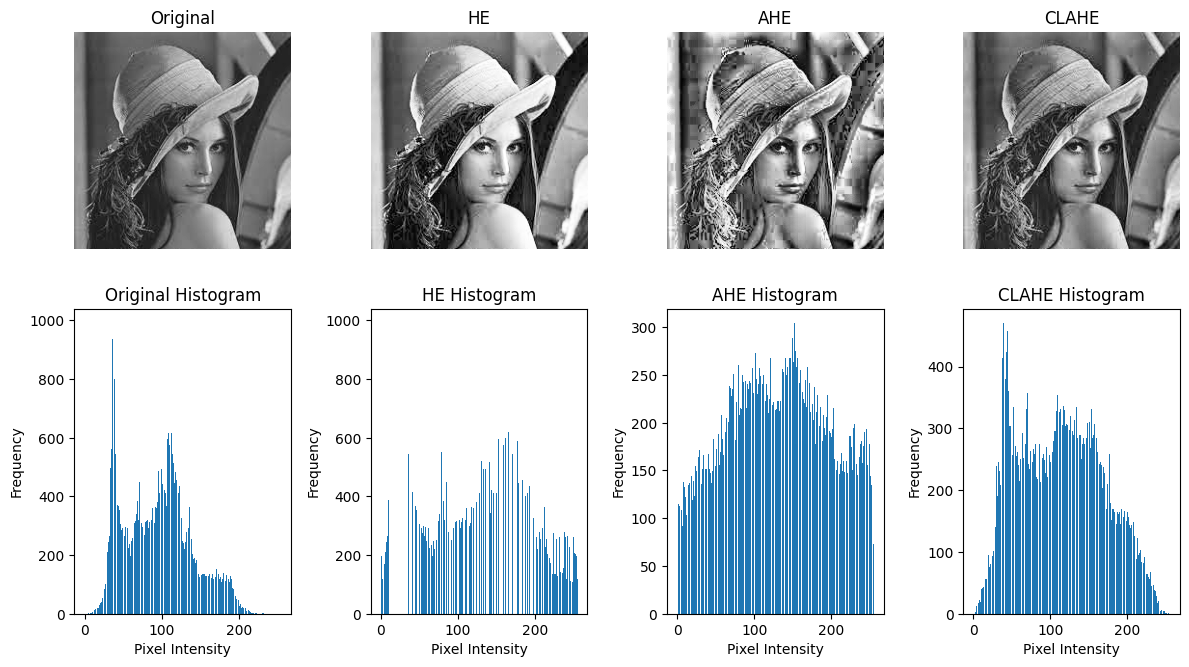

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('bahan/lenna.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization (HE)
equalized_he = cv2.equalizeHist(gray)

# Apply Adaptive Histogram Equalization (AHE)
ahe = cv2.createCLAHE(clipLimit=0.0, tileGridSize=(8, 8))
equalized_ahe = ahe.apply(gray)

# Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_clahe = clahe.apply(gray)

# Calculate histograms
hist_original, bins = np.histogram(gray.flatten(), 256, [0, 256])
hist_he, bins = np.histogram(equalized_he.flatten(), 256, [0, 256])
hist_ahe, bins = np.histogram(equalized_ahe.flatten(), 256, [0, 256])
hist_clahe, bins = np.histogram(equalized_clahe.flatten(), 256, [0, 256])

# Display the results using Matplotlib
plt.figure(figsize=(12, 7))

# Original Image
plt.subplot(2, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

# Original Histogram
plt.subplot(2, 4, 5)
plt.bar(bins[:-1], hist_original)
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# HE Image
plt.subplot(2, 4, 2)
plt.imshow(equalized_he, cmap='gray')
plt.title('HE')
plt.axis('off')

# HE Histogram
plt.subplot(2, 4, 6)
plt.bar(bins[:-1], hist_he)
plt.title('HE Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# AHE Image
plt.subplot(2, 4, 3)
plt.imshow(equalized_ahe, cmap='gray')
plt.title('AHE')
plt.axis('off')

# AHE Histogram
plt.subplot(2, 4, 7)
plt.bar(bins[:-1], hist_ahe)
plt.title('AHE Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# CLAHE Image
plt.subplot(2, 4, 4)
plt.imshow(equalized_clahe, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

# CLAHE Histogram
plt.subplot(2, 4, 8)
plt.bar(bins[:-1], hist_clahe)
plt.title('CLAHE Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

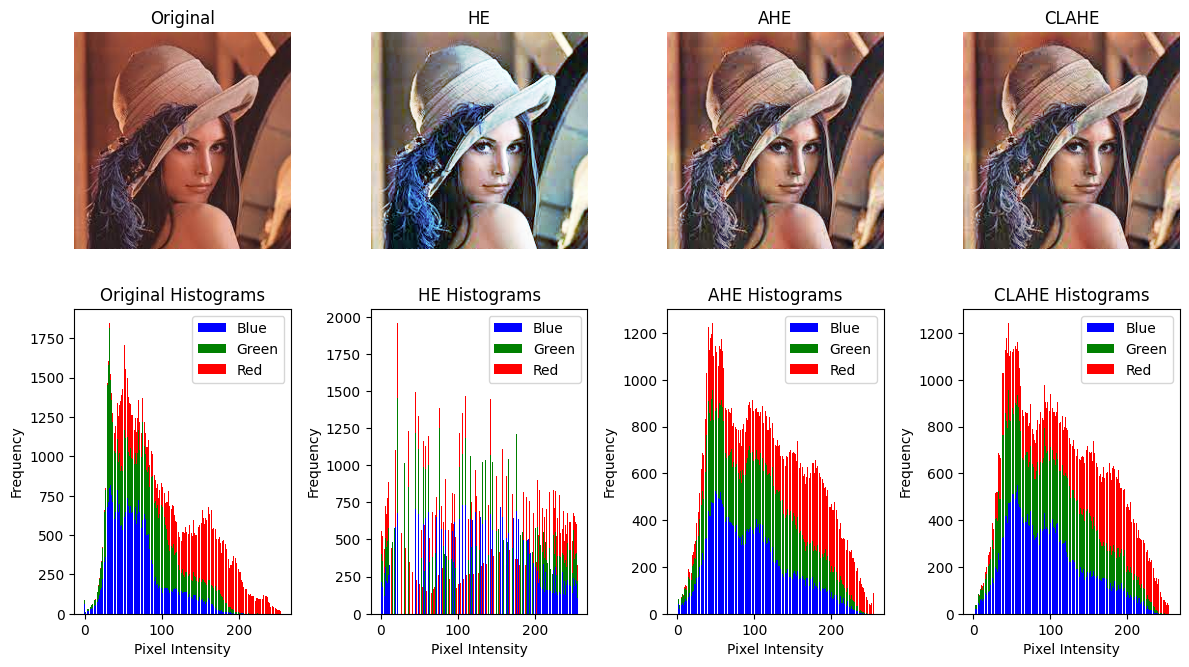

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('bahan/lenna.jpg')

# Apply Histogram Equalization (HE) to each channel
bgr_he = image.copy()

for i in range(3):
    bgr_he[:, :, i] = cv2.equalizeHist(bgr_he[:, :, i])

# Apply Adaptive Histogram Equalization (AHE) to each channel
bgr_ahe = image.copy()
ahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
for i in range(3):
    bgr_ahe[:, :, i] = ahe.apply(bgr_ahe[:, :, i])

# Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to each channel
bgr_clahe = image.copy()
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
for i in range(3):
    bgr_clahe[:, :, i] = clahe.apply(bgr_clahe[:, :, i])

# Calculate histograms for each channel
hist_original_b, bins = np.histogram(image[:, :, 0].flatten(), 256, [0, 256])
hist_original_g, bins = np.histogram(image[:, :, 1].flatten(), 256, [0, 256])
hist_original_r, bins = np.histogram(image[:, :, 2].flatten(), 256, [0, 256])

hist_he_b, bins = np.histogram(bgr_he[:, :, 0].flatten(), 256, [0, 256])
hist_he_g, bins = np.histogram(bgr_he[:, :, 1].flatten(), 256, [0, 256])
hist_he_r, bins = np.histogram(bgr_he[:, :, 2].flatten(), 256, [0, 256])

hist_ahe_b, bins = np.histogram(bgr_ahe[:, :, 0].flatten(), 256, [0, 256])
hist_ahe_g, bins = np.histogram(bgr_ahe[:, :, 1].flatten(), 256, [0, 256])
hist_ahe_r, bins = np.histogram(bgr_ahe[:, :, 2].flatten(), 256, [0, 256])

hist_clahe_b, bins = np.histogram(bgr_clahe[:, :, 0].flatten(), 256, [0, 256])
hist_clahe_g, bins = np.histogram(bgr_clahe[:, :, 1].flatten(), 256, [0, 256])
hist_clahe_r, bins = np.histogram(bgr_clahe[:, :, 2].flatten(), 256, [0, 256])

# Display the results using Matplotlib
plt.figure(figsize=(12, 7))

# Original Image
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# Original Histograms
plt.subplot(2, 4, 5)
plt.bar(bins[:-1], hist_original_b, color='blue', label='Blue')
plt.bar(bins[:-1], hist_original_g, color='green', label='Green', bottom=hist_original_b)
plt.bar(bins[:-1], hist_original_r, color='red', label='Red', bottom=hist_original_b + hist_original_g)
plt.title('Original Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# HE Image
plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(bgr_he, cv2.COLOR_BGR2RGB))
plt.title('HE')
plt.axis('off')

# HE Histograms
plt.subplot(2, 4, 6)
plt.bar(bins[:-1], hist_he_b, color='blue', label='Blue')
plt.bar(bins[:-1], hist_he_g, color='green', label='Green', bottom=hist_he_b)
plt.bar(bins[:-1], hist_he_r, color='red', label='Red', bottom=hist_he_b + hist_he_g)
plt.title('HE Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# AHE Image
plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(bgr_ahe, cv2.COLOR_BGR2RGB))
plt.title('AHE')
plt.axis('off')

# AHE Histograms
plt.subplot(2, 4, 7)
plt.bar(bins[:-1], hist_ahe_b, color='blue', label='Blue')
plt.bar(bins[:-1], hist_ahe_g, color='green', label='Green', bottom=hist_ahe_b)
plt.bar(bins[:-1], hist_ahe_r, color='red', label='Red', bottom=hist_ahe_b + hist_ahe_g)
plt.title('AHE Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# CLAHE Image
plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(bgr_clahe, cv2.COLOR_BGR2RGB))
plt.title('CLAHE')
plt.axis('off')

# CLAHE Histograms
plt.subplot(2, 4, 8)
plt.bar(bins[:-1], hist_clahe_b, color='blue', label='Blue')
plt.bar(bins[:-1], hist_clahe_g, color='green', label='Green', bottom=hist_clahe_b)
plt.bar(bins[:-1], hist_clahe_r, color='red', label='Red', bottom=hist_clahe_b + hist_clahe_g)
plt.title('CLAHE Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()